In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd drive/MyDrive/Emotion Recognition/Face Detection

Mounted at /content/drive/
/content/drive/MyDrive/Emotion Recognition/Face Detection


In [2]:
# Clone the detr github repo
!git clone https://github.com/facebookresearch/detr.git
import os
os.chdir('detr')
!git checkout 8a144f83a287f4d3fece4acdf073f387c5af387d

fatal: destination path 'detr' already exists and is not an empty directory.
M	datasets/coco.py
M	engine.py
HEAD is now at 8a144f8 docs: add GH button in support of Ukraine (#490)


In [3]:
# Import required libraries
import argparse
import random
from pathlib import Path

import numpy as np
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import PIL.Image

import util.misc as utils
from models import build_model

from main import get_args_parser

In [4]:
# Start training from the checkpoint
!python main.py --coco_path '/content/drive/MyDrive/Emotion Recognition/Face Detection/data' --epochs 1 --batch_size 3 --resume '/content/drive/MyDrive/detr-object-detection/ckpts/checkpoint.pth' --output_dir './ckpts'

Not using distributed mode
git:
  sha: 8a144f83a287f4d3fece4acdf073f387c5af387d, status: has uncommited changes, branch: HEAD

Namespace(lr=0.0001, lr_backbone=1e-05, batch_size=3, weight_decay=0.0001, epochs=1, lr_drop=200, clip_max_norm=0.1, frozen_weights=None, backbone='resnet50', dilation=False, position_embedding='sine', enc_layers=6, dec_layers=6, dim_feedforward=2048, hidden_dim=256, dropout=0.1, nheads=8, num_queries=100, pre_norm=False, masks=False, aux_loss=True, set_cost_class=1, set_cost_bbox=5, set_cost_giou=2, mask_loss_coef=1, dice_loss_coef=1, bbox_loss_coef=5, giou_loss_coef=2, eos_coef=0.1, dataset_file='coco', coco_path='/content/drive/MyDrive/Emotion Recognition/Face Detection/data', coco_panoptic_path=None, remove_difficult=False, output_dir='./ckpts', device='cuda', seed=42, resume='/content/drive/MyDrive/detr-object-detection/ckpts/checkpoint.pth', start_epoch=0, eval=False, num_workers=2, world_size=1, dist_url='env://', distributed=False)
/usr/local/lib/python

In [5]:
# Start training from the pretrained model (Only the first train)
!python main.py --coco_path '/content/drive/MyDrive/Emotion Recognition/Face Detection/data' --epochs 2 --batch_size 3 --resume 'https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth' --output_dir './ckpts'

Not using distributed mode
git:
  sha: 8a144f83a287f4d3fece4acdf073f387c5af387d, status: has uncommited changes, branch: HEAD

Namespace(lr=0.0001, lr_backbone=1e-05, batch_size=3, weight_decay=0.0001, epochs=2, lr_drop=200, clip_max_norm=0.1, frozen_weights=None, backbone='resnet50', dilation=False, position_embedding='sine', enc_layers=6, dec_layers=6, dim_feedforward=2048, hidden_dim=256, dropout=0.1, nheads=8, num_queries=100, pre_norm=False, masks=False, aux_loss=True, set_cost_class=1, set_cost_bbox=5, set_cost_giou=2, mask_loss_coef=1, dice_loss_coef=1, bbox_loss_coef=5, giou_loss_coef=2, eos_coef=0.1, dataset_file='coco', coco_path='/content/drive/MyDrive/Emotion Recognition/Face Detection/data', coco_panoptic_path=None, remove_difficult=False, output_dir='./ckpts', device='cuda', seed=42, resume='https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth', start_epoch=0, eval=False, num_workers=2, world_size=1, dist_url='env://', distributed=False)
/usr/local/lib/python3.10/dis

In [6]:
# Setup the model arguement parser
parser = argparse.ArgumentParser(description="DETR Args Parser", parents=[get_args_parser()])
args = parser.parse_args(args=[])
args.resume = '/content/drive/MyDrive/Emotion Recognition/Face Detection/detr/ckpts/checkpoint.pth'
args.device = 'cpu'

if args.output_dir:
  Path(args.output_dir).mkdir(parents=True, exist_ok=True)

args.distributed = False

print(args)

model, criterion, postprocessors = build_model(args)
device = torch.device(args.device)
model.to(device)

Namespace(lr=0.0001, lr_backbone=1e-05, batch_size=2, weight_decay=0.0001, epochs=300, lr_drop=200, clip_max_norm=0.1, frozen_weights=None, backbone='resnet50', dilation=False, position_embedding='sine', enc_layers=6, dec_layers=6, dim_feedforward=2048, hidden_dim=256, dropout=0.1, nheads=8, num_queries=100, pre_norm=False, masks=False, aux_loss=True, set_cost_class=1, set_cost_bbox=5, set_cost_giou=2, mask_loss_coef=1, dice_loss_coef=1, bbox_loss_coef=5, giou_loss_coef=2, eos_coef=0.1, dataset_file='coco', coco_path=None, coco_panoptic_path=None, remove_difficult=False, output_dir='', device='cpu', seed=42, resume='/content/drive/MyDrive/Emotion Recognition/Face Detection/detr/ckpts/checkpoint.pth', start_epoch=0, eval=False, num_workers=2, world_size=1, dist_url='env://', distributed=False)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, ou

In [7]:
# Download and load pretrained model weights
output_dir = Path(args.output_dir)
if args.resume:
  if args.resume.startswith('https'):
    checkpoint = torch.hub.load_state_dict_from_url(
        args.resume, map_location='cpu', check_hash=True
    )
  else:
    checkpoint = torch.load(
        args.resume, map_location='cpu'
    )
  model.load_state_dict(checkpoint['model'], strict=True)

In [8]:
# COCO Classes
CLASSES = [
   'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
   'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
   'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
   'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
   'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
   'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
   'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
   'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
   'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
   'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
   'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
   'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
   'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
   'toothbrush'
]

# Colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# Standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# For output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

# Resize bounding boxes to be full size of the image
def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

In [9]:
def detect(im, model, transform):
  img = transform(im).unsqueeze(0)
  assert img.shape[-2] <= 1600 and img.shape[-1] <= 1600, 'Demo model only supports images up to 1600 on each side.'
  outputs = model(img)
  probas = outputs['pred_logits'].softmax(-1)[0,:,:-1]
  keep = probas.max(-1).values > 0.7
  bboxes_scaled = rescale_bboxes(outputs['pred_boxes'][0,keep], im.size)
  return probas[keep], bboxes_scaled

def plot_results(pil_img, class_probs, b_boxes, classes, is_ground_truth=False):
    plt.figure(figsize=(16,10))
    plt.axis('off')
    ax = plt.gca()
    ax.imshow(pil_img)

    for p, (xmin, ymin, xmax, ymax), c in zip(class_probs, b_boxes, COLORS * 100):
        cl = p if is_ground_truth else p.argmax()
        # If the class isn't present, skip this annotation
        if CLASSES[cl] not in classes:
            continue
        # Plot bounding box and label (Note difference in bounding box format, xmax vs xmax-xmin)
        xmax = xmax if is_ground_truth else xmax-xmin
        ymax = ymax if is_ground_truth else ymax-ymin
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax, ymax, fill=False, color=c, linewidth=3))

        text = f"{CLASSES[cl]}" if is_ground_truth else f"{CLASSES[cl]}: {p[cl]:0.2f}"
        ax.text(xmin,ymin, text, fontsize=15, bbox=dict(facecolor="yellow", alpha=0.5))

    # Show the plot
    plt.show()

In [10]:
torch.save(model, 'detr_model_full.pth')

In [11]:
from google.colab import files
files.download('detr_model_full.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

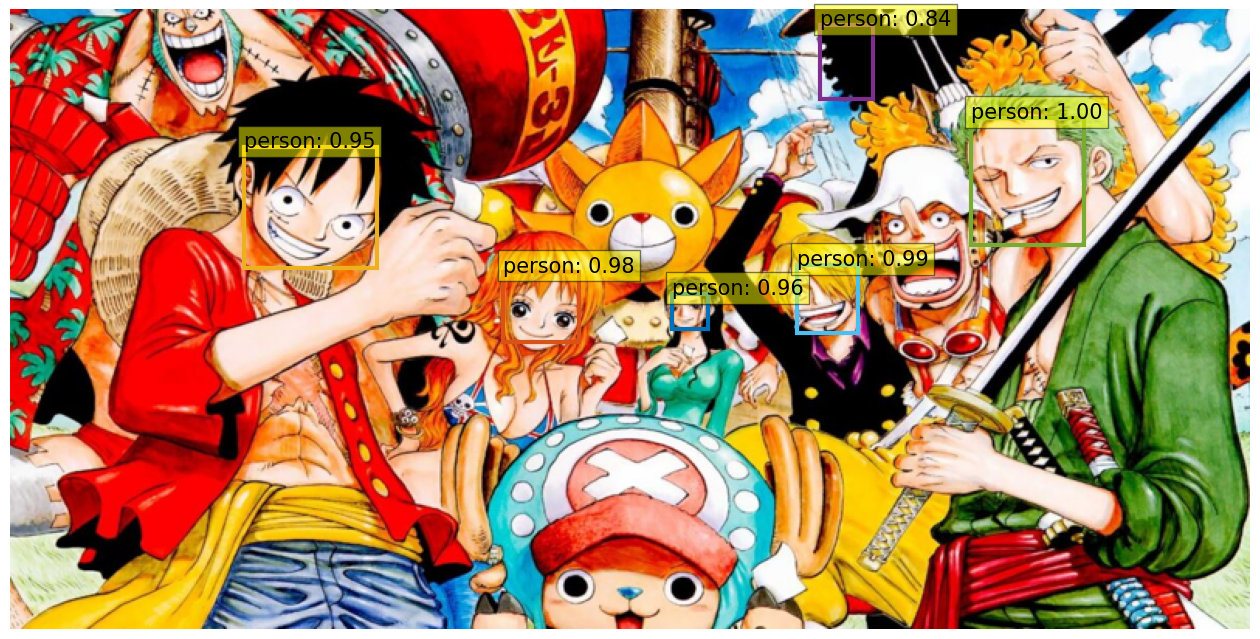

In [12]:
the_image = PIL.Image.open('/content/drive/MyDrive/Emotion Recognition/Face Detection/testImg/t5.jpg').convert('RGB').resize((800,400))
scores, boxes = detect(the_image, model, transform)
plot_classes = ['person']
plot_results(the_image, scores, boxes.tolist(), plot_classes)